# Hypothesis Testing in Healthcare: Drug Safety

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda).

Your organization has asked you to explore and answer some questions from the data collected. See the project instructions.

## **Two-sample proportions z-test**

Determine if the proportion of adverse_effects differs significantly between the trx groups.

In [1]:
# Import packages
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")

# View first few rows
drug_safety.head()

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0


In [3]:
# Getting the count of successes and total counts
    # A "success" would be where "adverse_effects" is "True"

# Create a variable containing the frequency of "adverse_effects" for each group
adv_frequency = drug_safety.groupby('trx')['adverse_effects'].value_counts()
adv_frequency

trx      adverse_effects
Drug     No                 9703
         Yes                1024
Placebo  No                 4864
         Yes                 512
Name: adverse_effects, dtype: int64

In [4]:
# Get the total counts in each group by calculating the sum of successes and failures within each group
group_counts = adv_frequency.groupby('trx').sum()
group_counts

trx
Drug       10727
Placebo     5376
Name: adverse_effects, dtype: int64

In [5]:
# Put the number of successes in each group in a numpy array.
count_success_arr = adv_frequency.xs(key='Yes', level='adverse_effects', axis=0, drop_level=False).to_numpy()
count_success_arr

array([1024,  512], dtype=int64)

In [6]:
# Put each group's total number of observations (rows) in a numpy array.
count_group_arr = group_counts.to_numpy()
count_group_arr

array([10727,  5376], dtype=int64)

**Data from two independent groups:**
- **Group 1 (**Drug**)**: 10727 individuals, 1024 of whom have adverse effects.
- **Group 2 (**Placebo**)**: 5376 individuals, 512 of whom have adverse effects.

In [7]:
# Performing a two-sample proportions z-test
# proportions_ztest() takes the number of successes and total number of observations, returning a tuple containing the z-statistic and p-value.

two_sample_results = proportions_ztest(count=count_success_arr, nobs=count_group_arr)

# Subset the second element (p-value)
two_sample_p_value = two_sample_results[1]
two_sample_p_value

0.9639333330262475

The p-value is 0.9639, which is much greater than the significance level (0.05).Therefore, there is no statistical evidence to suggest a significant difference in the proportions of adverse effects between the two groups.

## Association between adverse effects and treatment groups

Find out if the number of adverse effects is independent of the treatment and control groups.

In [8]:
# Conduct a Chi-square test of independence.
num_effects_groups = pingouin.chi2_independence(data=drug_safety, x='trx', y='num_effects')
num_effects_groups

C:\Users\Lenovo\anaconda3\Lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\Lenovo\anaconda3\Lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


(num_effects            0           1          2         3
 trx                                                      
 Drug         9703.794883  960.587096  58.621126  3.996895
 Placebo      4863.205117  481.412904  29.378874  2.003105,
 num_effects     0    1   2  3
 trx                          
 Drug         9703  956  63  5
 Placebo      4864  486  25  1,
                  test    lambda      chi2  dof      pval    cramer     power
 0             pearson  1.000000  1.799644  3.0  0.615012  0.010572  0.176275
 1        cressie-read  0.666667  1.836006  3.0  0.607131  0.010678  0.179153
 2      log-likelihood  0.000000  1.922495  3.0  0.588648  0.010926  0.186033
 3       freeman-tukey -0.500000  2.001752  3.0  0.572043  0.011149  0.192379
 4  mod-log-likelihood -1.000000  2.096158  3.0  0.552690  0.011409  0.199984
 5              neyman -2.000000  2.344303  3.0  0.504087  0.012066  0.220189)

In [9]:
# Subset for the p-value of the test
num_effects_p_value = num_effects_groups[2]['pval'][0]

# Show the result
num_effects_p_value

0.6150123339426765

The p-value (0.6150) is greater than the commonly used significance level of 0.05. Hence, there is not enough evidence to suggest that the number of adverse effects is significantly associated with the treatment and control groups. In other words, there is no sufficient statistical evidence to conclude that there is a relationship or dependency between the treatment received and the occurrence of adverse effects.

_The warning about low count on observed frequencies is a common caution in statistical analysis, particularly in the context of chi-square tests of independence. The warning is typically raised when one or more cells in the contingency table have expected frequencies below a certain threshold._

_**The minimum expected frequency threshold varies**, but a common rule of thumb is that all expected frequencies should be greater than or equal to 5.([biostathandbook.com](https://www.biostathandbook.com/small.html))_

_The concern regarding low expected frequencies is often overstated. While some suggest worrying when expected frequencies fall below 5, the observation aligns more with a commonly accepted guideline, as articulated by Harold Jeffreys in his work "Theory of Probability" (Oxford University Press, 1961). According to this perspective, the only significant concern arises when expected frequencies drop below 1, and in this case, none of the expected frequencies are that low. ([StackExchange](https://stats.stackexchange.com/questions/370105/contingency-table-2x4-right-test-confidence-intervals))_

## Inspecting whether age is normally distributed

To confirm whether age differs significantly between the trx groups, check if age is normally distributed in the trx groups. This can be done visually or by using a statistical test using the **Jarque-Bera test**.

The Jarque-Bera test is a statistical test used to assess whether a given sample follows a normal distribution. It is particularly suitable for large sample sizes (compared to Shapiro-Wilk test which can be used if data points is below 5000). The purpose of the test is to evaluate whether the skewness and kurtosis of the sample data match the skewness and kurtosis expected in a normal distribution.

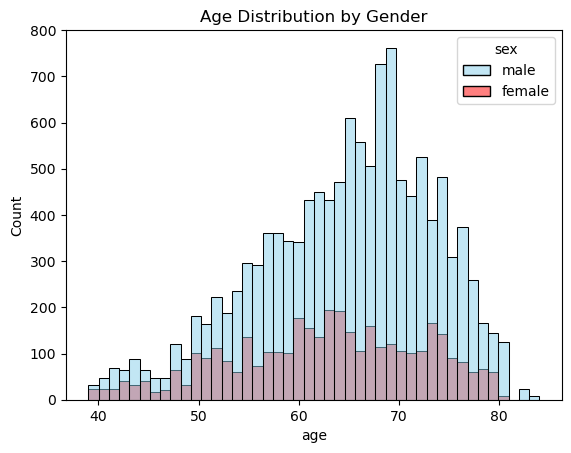

In [10]:
# Create a histogram
custom_palette = {'male': 'skyblue', 'female': 'red'}
sns.histplot(data=drug_safety, x='age',hue='sex', palette=custom_palette)

# Add a title
plt.title('Age Distribution by Gender');

In [11]:
# Test for normality
# Test for a difference in distributions of age between the two trx groups

pingouin.normality(data=drug_safety, dv='age', group='sex', method='jarque_bera')

,W,pval,normal
sex,,,
male,561.912729,9.598453e-123,False
female,112.482933,3.755272e-25,False


For both males and females, the p-values are very close to zero (9.598453e-123 for males and 3.755272e-25 for females), which is much smaller than the significance level of 0.05.

The evidence from the  Jarque-Bera test suggests that the age distributions for both males and females are not normal.

Therefore, the assumption of normality may not be met for the age variable in both treatment groups.

## Significant difference between the ages of both groups

To ensure age wasn't a confounder, conduct a Mann-Whitney test to determine if age differed significantly between the trx groups.

It is commonly employed when the data is not normally distributed or when the assumption of equal variances is not met. It is used to determine whether there is a significant difference between the distributions of two groups.

In [12]:
# Create two variables, age_trx and age_placebo by filtering where trx is "Drug" and subsetting the age column, then repeating where trx is "Placebo".
age_trx = drug_safety[drug_safety['trx'] == 'Drug'].loc[:,'age']
age_placebo = drug_safety[drug_safety['trx'] == 'Placebo'].loc[:, 'age']

# Perform a Mann-Whitney U test
mwu_result = pingouin.mwu(x=age_trx, y=age_placebo)

# View the result
mwu_result

,U-val,alternative,p-val,RBC,CLES
MWU,29149339.5,two-sided,0.256963,-0.01093,0.505465


In [13]:
# Extract the "p-val" column
age_group_effects_p_value = mwu_result['p-val']
age_group_effects_p_value

MWU    0.256963
Name: p-val, dtype: float64

The p-value is greater than the significance level (0.05), hence failed to reject the null hypothesis, suggesting that there is not enough evidence to claim significant difference in age between the groups.